# Spotify Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
!pip install control
import control
%matplotlib inline

In [2]:
df = pd.read_csv('/content/Spotify_music_taste.csv', converters={'genres': eval})
df.drop_duplicates(subset=['artist', 'username', 'name'], ignore_index = True, inplace=True)
display(df.shape)

df2 = df.copy()

# Convert 'loudness' from decibel to magnitude
df2['loudness'] = control.db2mag(df['loudness'])
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Normalize 'loudness' using MinMaxScaler
mscaler = MinMaxScaler()
df2[['loudness']] = mscaler.fit_transform(df2[['loudness']])

# Normalize 'popularity' by dividing by 100 to scale it between 0 and 1
df2['popularity'] /= 100

# Standardize 'duration' and 'tempo', then shift the values by 0.5 for scaling
scaler = StandardScaler()
df2[['duration','tempo']] = scaler.fit_transform(df2[['duration','tempo']]) + 0.5

(627, 16)

In [3]:
df.head()

artist                    name         username  explicit  \
0       Damien Rice   The Blower's Daughter  MelodicWanderer     False   
1  Jay-Jay Johanson            Only for You  MelodicWanderer     False   
2        Lily Allen  Somewhere Only We Know  MelodicWanderer     False   
3         Jacob Lee                 Reality  MelodicWanderer     False   
4   Stephen Sanchez         Easy On My Eyes  MelodicWanderer     False   

   duration  popularity  danceability  loudness    tempo  acousticness  \
0    286653          61         0.342   -13.569  133.113         0.134   
1    230240          10         0.482   -12.924  122.593         0.852   
2    208154          54         0.314   -10.191  172.021         0.935   
3    235194          33         0.597    -5.838   85.864         0.123   
4    238173          46         0.501   -13.042  122.334         0.948   

   energy  valence  liveness  speechiness  \
0   0.200   0.0743    0.3410       0.0324   
1   0.259   0.4010    0.1050       0.0603   
2   0.286   0.2780    0.0999       0.0350   
3   0.642   0.2940    0.2700       0.0285   
4   0.105   0.2030    0.0875       0.0410   

                                              genres  date  
0  [acoustic pop, irish rock, irish singer-songwr...  2003  
1  [swedish electropop, swedish singer-songwriter...  2007  
2                [dance pop, electropop, neo mellow]  2013  
3                                   [australian pop]  2019  
4                          [gen z singer-songwriter]  2022

In [4]:
df2.head()

artist                    name         username  explicit  \
0       Damien Rice   The Blower's Daughter  MelodicWanderer     False   
1  Jay-Jay Johanson            Only for You  MelodicWanderer     False   
2        Lily Allen  Somewhere Only We Know  MelodicWanderer     False   
3         Jacob Lee                 Reality  MelodicWanderer     False   
4   Stephen Sanchez         Easy On My Eyes  MelodicWanderer     False   

   duration  popularity  danceability  loudness     tempo  acousticness  \
0  1.731832        0.61         0.342  0.255096  0.912464         0.134   
1  0.656046        0.10         0.482  0.276410  0.546398         0.852   
2  0.234871        0.54         0.314  0.386536  2.266355         0.935   
3  0.750518        0.33         0.597  0.651955 -0.731669         0.123   
4  0.807327        0.46         0.501  0.272391  0.537385         0.948   

   energy  valence  liveness  speechiness  \
0   0.200   0.0743    0.3410       0.0324   
1   0.259   0.4010    0.1050       0.0603   
2   0.286   0.2780    0.0999       0.0350   
3   0.642   0.2940    0.2700       0.0285   
4   0.105   0.2030    0.0875       0.0410   

                                              genres  date  
0  [acoustic pop, irish rock, irish singer-songwr...  2003  
1  [swedish electropop, swedish singer-songwriter...  2007  
2                [dance pop, electropop, neo mellow]  2013  
3                                   [australian pop]  2019  
4                          [gen z singer-songwriter]  2022

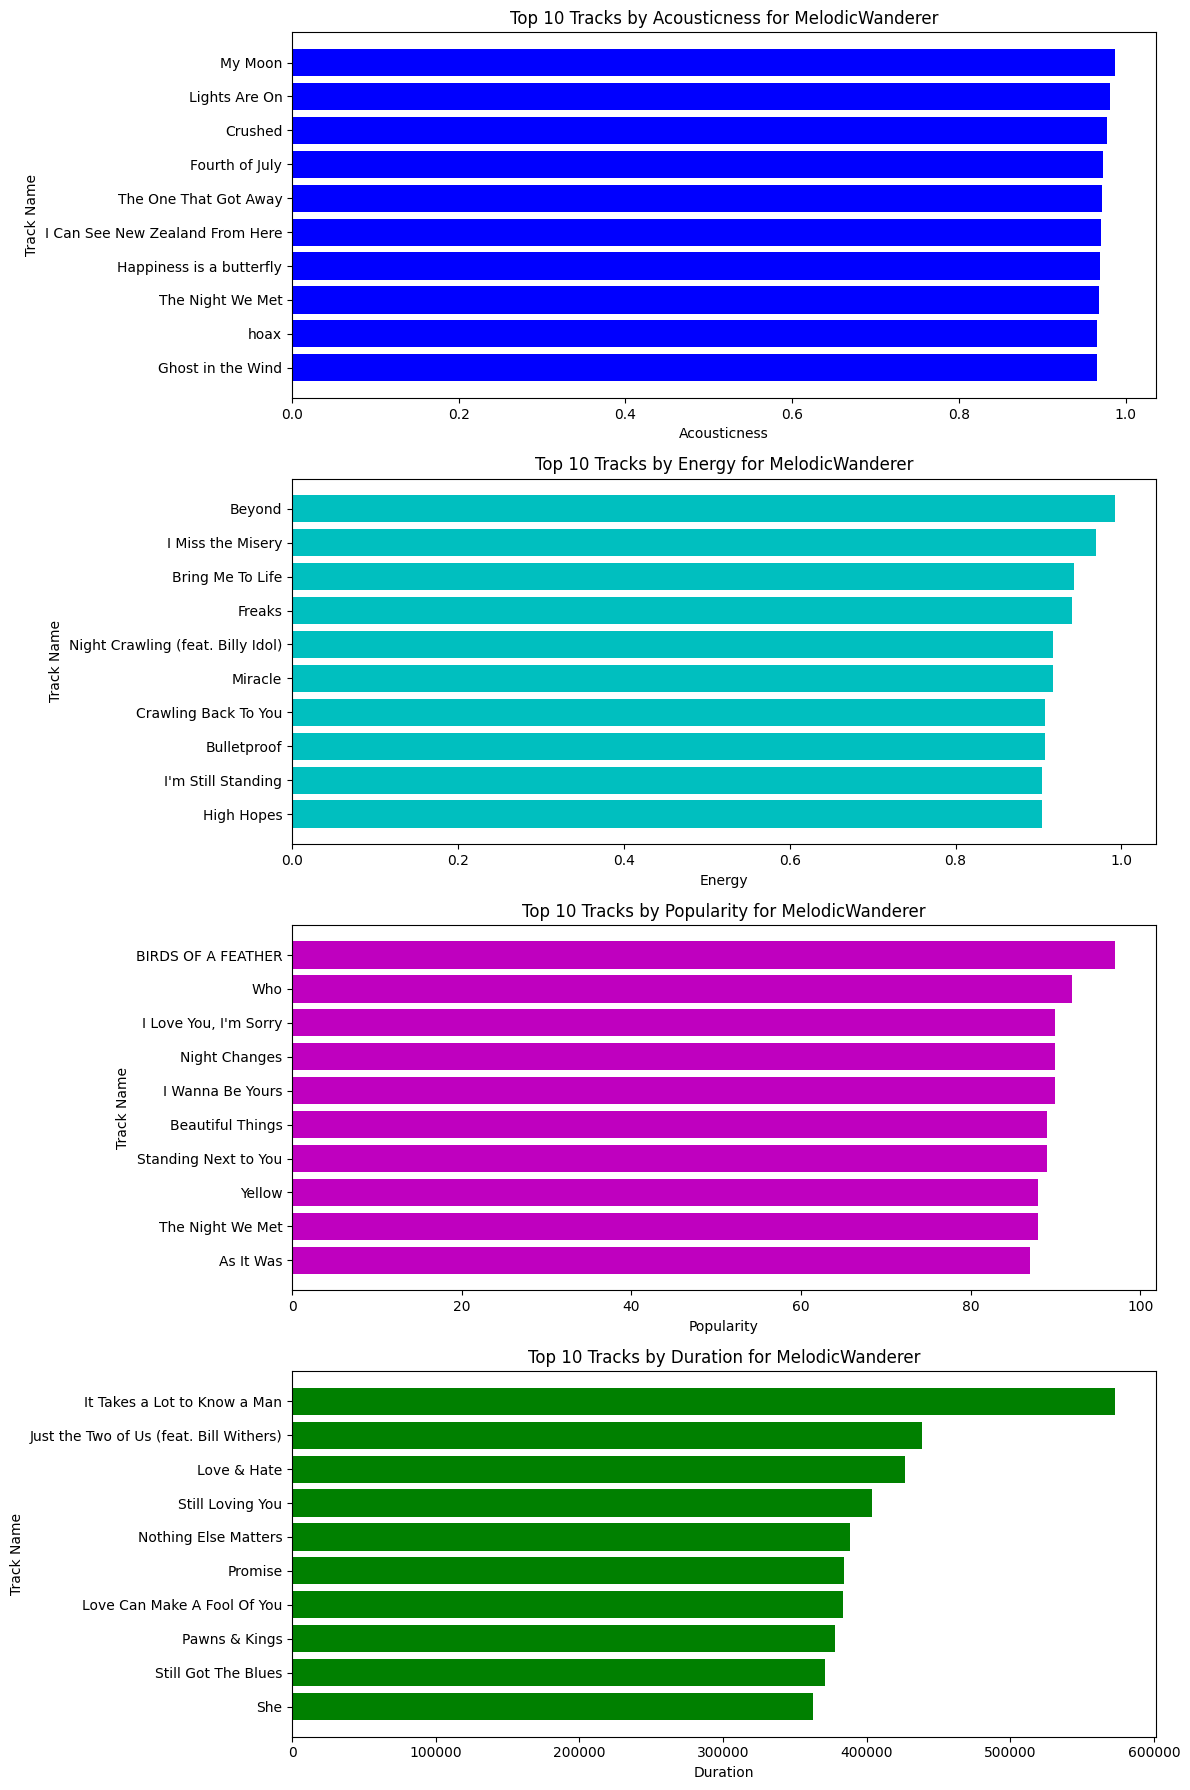

In [5]:
# Filter data for MelodicWanderer
df_melodic = df[df['username'] == 'MelodicWanderer']

# Sort by acousticness
top_acousticness_tracks = df_melodic.sort_values(by='acousticness', ascending=False).head(10)

# Sort by energy
top_energy_tracks = df_melodic.sort_values(by='energy', ascending=False).head(10)

# Sort by popularity
top_popularity_tracks = df_melodic.sort_values(by='popularity', ascending=False).head(10)

# Sort by duration
top_duration_tracks = df_melodic.sort_values(by='duration', ascending=False).head(10)

plt.figure(figsize=(12, 18))

# Plotting acousticness
plt.subplot(4, 1, 1)
plt.barh(top_acousticness_tracks['name'], top_acousticness_tracks['acousticness'], color='b')
plt.xlabel('Acousticness')
plt.ylabel('Track Name')
plt.title('Top 10 Tracks by Acousticness for MelodicWanderer')
plt.gca().invert_yaxis()

# Plotting energy
plt.subplot(4, 1, 2)
plt.barh(top_energy_tracks['name'], top_energy_tracks['energy'], color='c')
plt.xlabel('Energy')
plt.ylabel('Track Name')
plt.title('Top 10 Tracks by Energy for MelodicWanderer')
plt.gca().invert_yaxis()

# Plotting popularity
plt.subplot(4, 1, 3)
plt.barh(top_popularity_tracks['name'], top_popularity_tracks['popularity'], color='m')
plt.xlabel('Popularity')
plt.ylabel('Track Name')
plt.title('Top 10 Tracks by Popularity for MelodicWanderer')
plt.gca().invert_yaxis()

# Plotting duration
plt.subplot(4, 1, 4)
plt.barh(top_duration_tracks['name'], top_duration_tracks['duration'], color='g')
plt.xlabel('Duration')
plt.ylabel('Track Name')
plt.title('Top 10 Tracks by Duration for MelodicWanderer')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

In [6]:
# Filter data for Icecreamy008
df_ice = df[df['username'] == 'Icecreamy008']

# Sort by acousticness
top_acousticness_tracks = df_ice.sort_values(by='acousticness', ascending=False).head(10)

# Sort by popularity
top_popularity_tracks = df_ice.sort_values(by='popularity', ascending=False).head(10)

plt.figure(figsize=(12, 9))

# Plotting acousticness
plt.subplot(2, 1, 1)
plt.barh(top_acousticness_tracks['name'], top_acousticness_tracks['acousticness'], color='b')
plt.xlabel('Acousticness')
plt.ylabel('Track Name')
plt.title('Top 10 Tracks by Acousticness for Icecreamy008')
plt.gca().invert_yaxis()

# Plotting popularity
plt.subplot(2, 1, 2)
plt.barh(top_popularity_tracks['name'], top_popularity_tracks['popularity'], color='m')
plt.xlabel('Popularity')
plt.ylabel('Track Name')
plt.title('Top 10 Tracks by Popularity for Icecreamy008')
plt.gca().invert_yaxis()

plt.tight_layout()

plt.show()

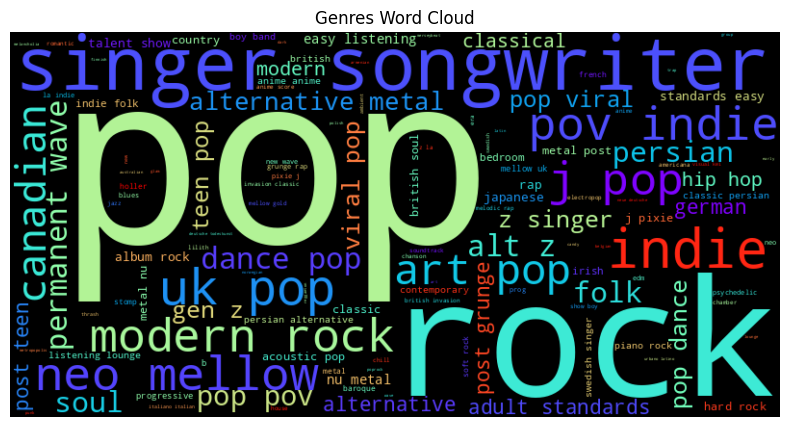

In [7]:
from wordcloud import WordCloud

# Combine all genres into a single string
all_genres = ' '.join(df2['genres'].apply(lambda x: ' '.join(x)))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='rainbow').generate(all_genres)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Genres Word Cloud')
plt.savefig('WordCloud.png')
plt.show()

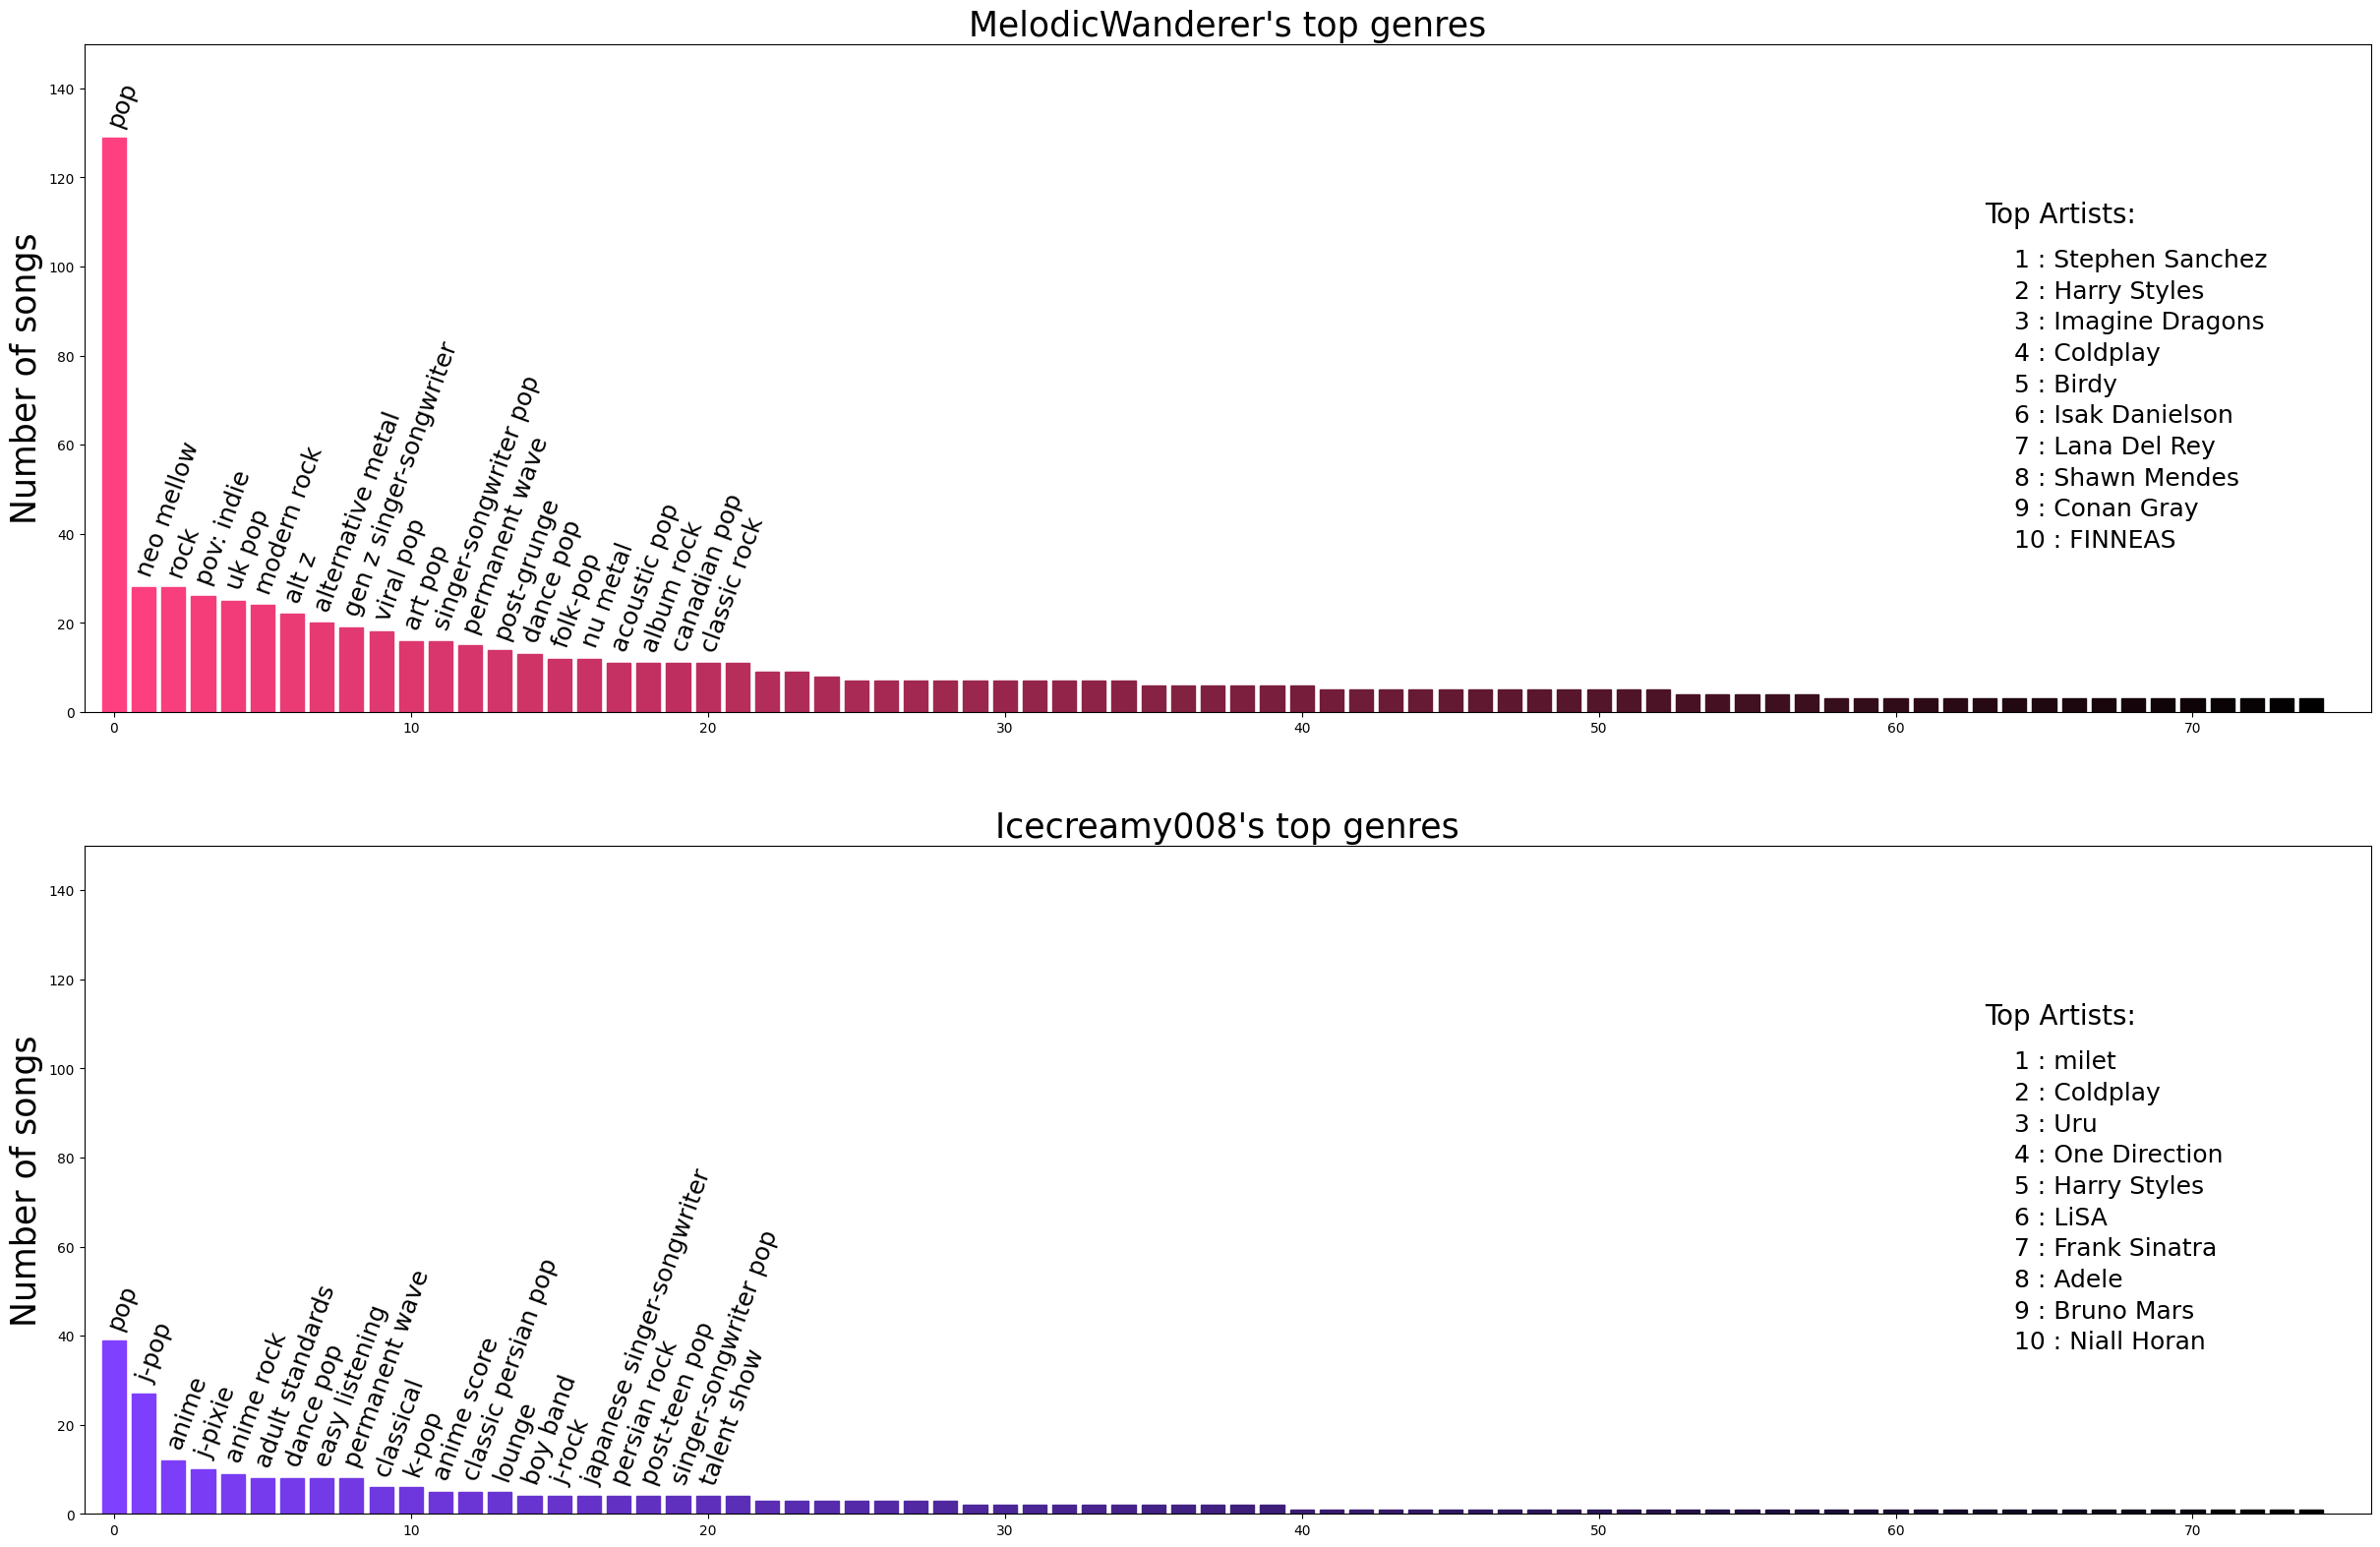

In [8]:
# Function to plot genres and top artists for a given username
def plot_user_data(df, username, color_scheme, subplot_pos):
    # Filter top artists
    top_artists = df[df['username'] == username]['artist'].value_counts()[:10].index
    # Flatten and count genres
    genres = df[df['username'] == username]['genres'].to_numpy().flatten()
    genres = np.concatenate(genres).ravel()
    unique, counts = np.unique(genres, return_counts=True)
    genres = dict(zip(unique, counts))
    genres = sorted(genres.items(), key=lambda x: x[1], reverse=True)

    # Plot genres
    plt.subplot(3, 1, subplot_pos)
    plt.xlim(-1, 76)
    plt.ylim(0, 150)
    plt.title(f"{username}'s top genres", fontsize=25)
    plt.ylabel('Number of songs', fontsize=25)

    tmp = [genre[1] for genre in genres]
    tmp2 = [genre[0] for genre in genres]


    bars = plt.bar(range(75), tmp[:75])
    for bar, color_value in zip(bars, np.linspace(0, 1, 75)):
        bar.set_color((color_scheme[0] * (1-color_value), color_scheme[1]* (1-color_value), color_scheme[2] * (1-color_value)))

    for index, data in enumerate(tmp):
        plt.text(x=index-0.35, y=data+3, s=f"{tmp2[index]}", rotation=70, fontsize=18)
        if index == 20:
            break

    # Plot top artists
    plt.text(x=63, y=110, s="Top Artists:", rotation=0, fontsize=20)
    for index, data in enumerate(top_artists):
        plt.text(x=64, y=100 - index*7, s=f"{index + 1} : {data}", rotation=0, fontsize=18)
        if index == 10:
            break

# Plot data for MelodicWanderer and Icecreamy008
plt.figure(figsize=(30, 30))

plot_user_data(df, 'MelodicWanderer', [1, 0.25, 0.5], 1)
plot_user_data(df, 'Icecreamy008', (0.5, 0.25, 1), 2)

plt.savefig('Genres.png')
plt.show()

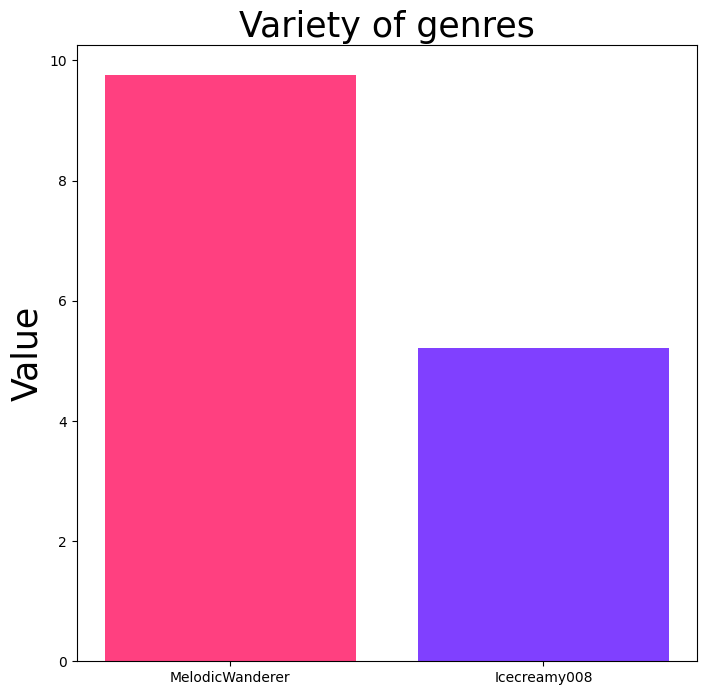

In [9]:
# Function to calculate genre variety (standard deviation)
def calculate_genre_variety(username):
    genres = df2[df2['username'] == username]['genres'].to_numpy().flatten()
    genres = np.concatenate(genres).ravel()
    unique, counts = np.unique(genres, return_counts=True)
    return np.std(counts)

# Calculate genre variety for MelodicWanderer and Icecreamy008
var_me = calculate_genre_variety('MelodicWanderer')
var_ice = calculate_genre_variety('Icecreamy008')

plt.figure(figsize=(8,8))
plt.bar(['MelodicWanderer', 'Icecreamy008'], [var_me, var_ice], color=[(1, 0.25, 0.5),(0.5, 0.25, 1)]);
plt.title('Variety of genres', fontsize=25)
plt.ylabel('Value',  fontsize=25)
plt.savefig('Genres_std.png')

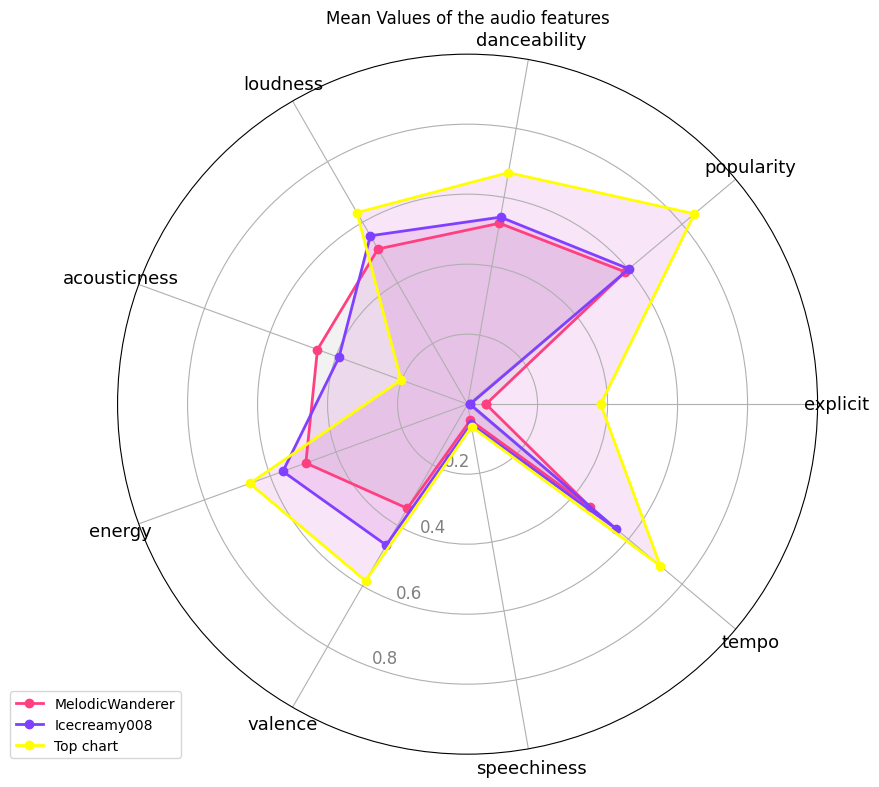

In [10]:
MelodicWanderer_features = df2[df2.username=='MelodicWanderer'].loc[:,['explicit', 'popularity', 'danceability','loudness',
                           'acousticness', 'energy', 'valence', 'speechiness', 'tempo']].reset_index().drop(columns='index')

Icecreamy008_features = df2[df2.username=='Icecreamy008'].loc[:,['explicit', 'popularity', 'danceability','loudness',
                           'acousticness', 'energy', 'valence', 'speechiness', 'tempo']].reset_index().drop(columns='index')

top_features = df2[df2.username=="Spotify"].loc[:,['explicit', 'popularity', 'danceability','loudness',
                           'acousticness', 'energy', 'valence', 'speechiness', 'tempo']].reset_index().drop(columns='index')

labels = list(MelodicWanderer_features.columns)
MelodicWanderer_stats= MelodicWanderer_features.mean().tolist()
Icecreamy008_stats= Icecreamy008_features.mean().tolist()
top_stats= top_features.mean().tolist()

angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)

# close the plot
MelodicWanderer_stats=np.concatenate((MelodicWanderer_stats,[MelodicWanderer_stats[0]]))
Icecreamy008_stats =np.concatenate((Icecreamy008_stats,[Icecreamy008_stats[0]]))
top_stats =np.concatenate((top_stats,[top_stats[0]]))
angles=np.concatenate((angles,[angles[0]]))

#Size of the figure
fig=plt.figure(figsize = (20,20))

ax = fig.add_subplot(221, polar=True)
ax.plot(angles, MelodicWanderer_stats, 'o-', linewidth=2, label="MelodicWanderer", color=(1, 0.25, 0.5))
ax.fill(angles, MelodicWanderer_stats, alpha=0.1, facecolor='gray')
ax.set_thetagrids(angles[:-1] * 180/np.pi, labels, fontsize=13)

ax.plot(angles, Icecreamy008_stats, 'o-', linewidth=2, label="Icecreamy008", color=(0.5, 0.25, 1))
ax.fill(angles, Icecreamy008_stats, alpha=0.1, facecolor='m')
ax.set_title('Mean Values of the audio features')
ax.grid(True)

ax.plot(angles, top_stats, 'o-', linewidth=2, label = "Top chart", color = 'yellow')
ax.fill(angles, top_stats, alpha=0.1, facecolor='m' )
ax.set_title('Mean Values of the audio features')
ax.grid(True)

plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))
ax.set_rlabel_position(250)
plt.yticks([0.2 , 0.4 , 0.6 , 0.8], ["0.2",'0.4', "0.6", "0.8"], color="grey", size=12)
plt.ylim(0,1)

plt.savefig('Mean')
plt.show()

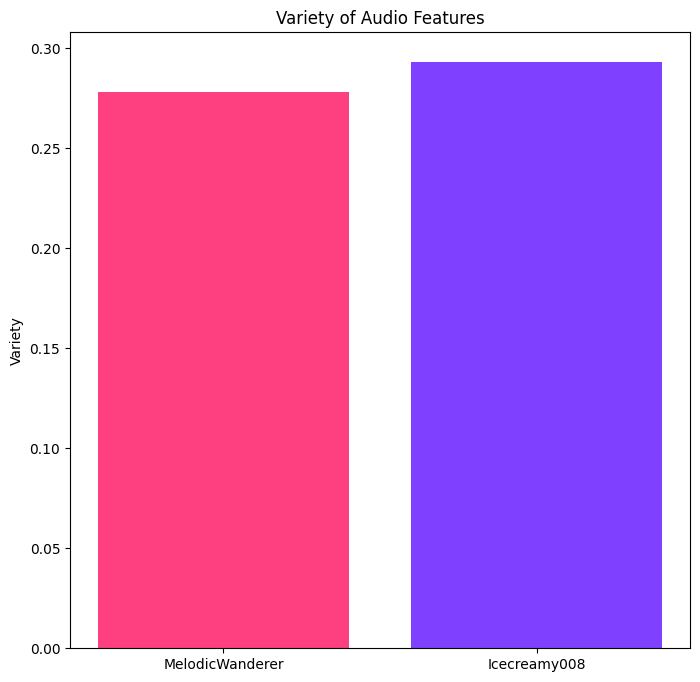

In [11]:
plt.figure(figsize=(8,8))

data = [MelodicWanderer_features.std().mean(), Icecreamy008_features.std().mean()]
plt.bar(['MelodicWanderer', 'Icecreamy008'], data, color=[(1, 0.25, 0.5),(0.5, 0.25, 1)])
plt.ylabel('Variety')
plt.title('Variety of Audio Features')
plt.savefig('Audio_std.png')
plt.show()

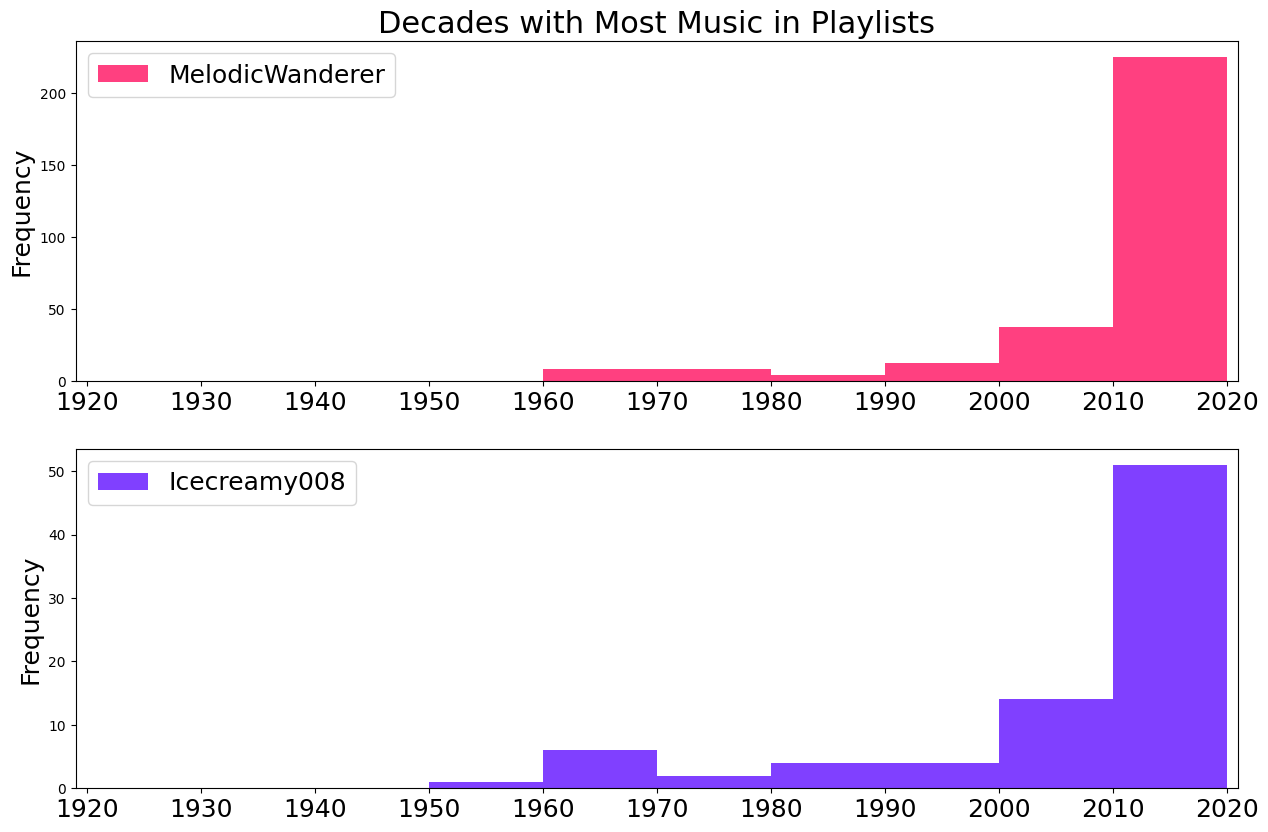

In [12]:
MelodicWanderer_date = df2[df2.username=='MelodicWanderer'].loc[:,['date']].reset_index().drop(columns='index')
Icecreamy008_date = df2[df2.username=='Icecreamy008'].loc[:,['date']].reset_index().drop(columns='index')

plt.figure(figsize=(15,15))
plt.subplot(3,1,1)
plt.title('Decades with Most Music in Playlists', fontsize=22)
plt.hist(MelodicWanderer_date.date, bins=range(1920, 2024, 10), color=(1, 0.25, 0.5), label='MelodicWanderer')
plt.legend(fontsize=18)
plt.xlim((1919,2021))
plt.xticks(range(1920, 2021, 10), fontsize=18)
plt.ylabel('Frequency', fontsize=18)

plt.subplot(3,1,2)
plt.hist(Icecreamy008_date.date, bins=range(1920, 2024, 10), color=(0.5, 0.25, 1), label='Icecreamy008')
plt.legend(fontsize=18)
plt.xlim((1919,2021))
plt.xticks(range(1920, 2021, 10), fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.savefig('Music_Distribution_by_Decades.png')

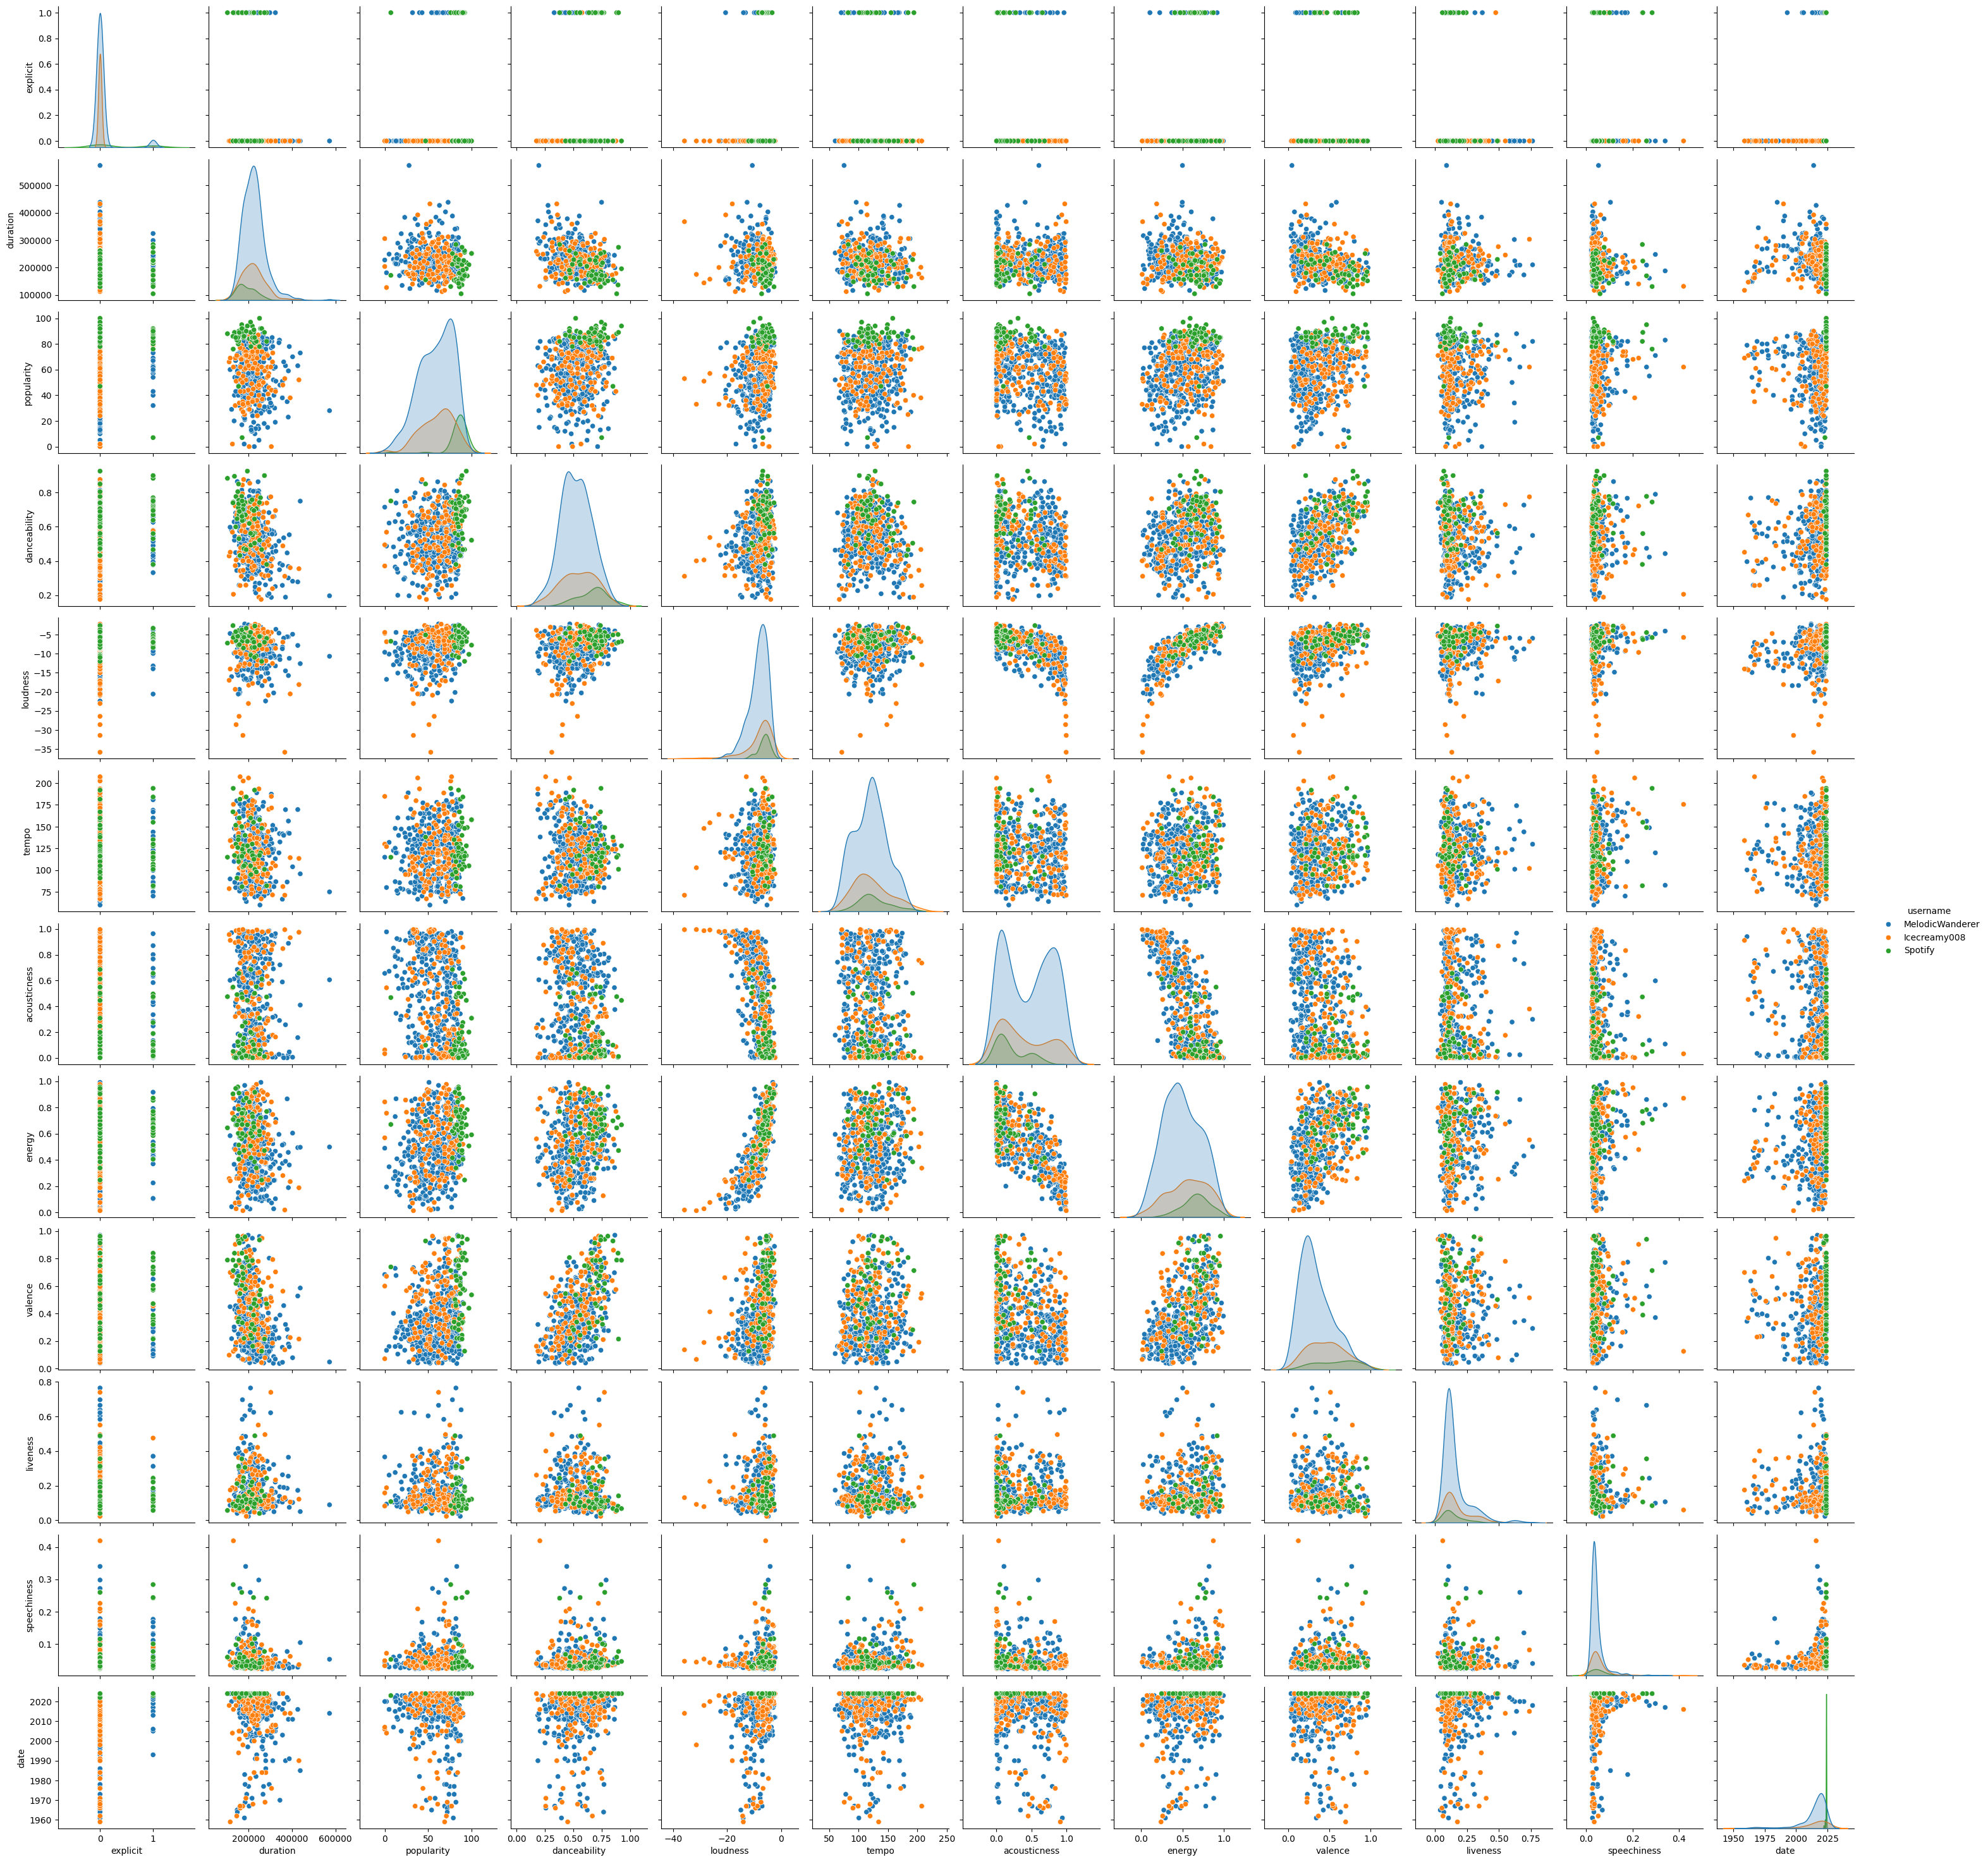

In [13]:
mus = sns.pairplot(df, hue='username')

array([[<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'popularity'}>,
        <Axes: title={'center': 'danceability'}>],
       [<Axes: title={'center': 'loudness'}>,
        <Axes: title={'center': 'tempo'}>,
        <Axes: title={'center': 'acousticness'}>],
       [<Axes: title={'center': 'energy'}>,
        <Axes: title={'center': 'valence'}>,
        <Axes: title={'center': 'liveness'}>],
       [<Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'date'}>, <Axes: >]], dtype=object)

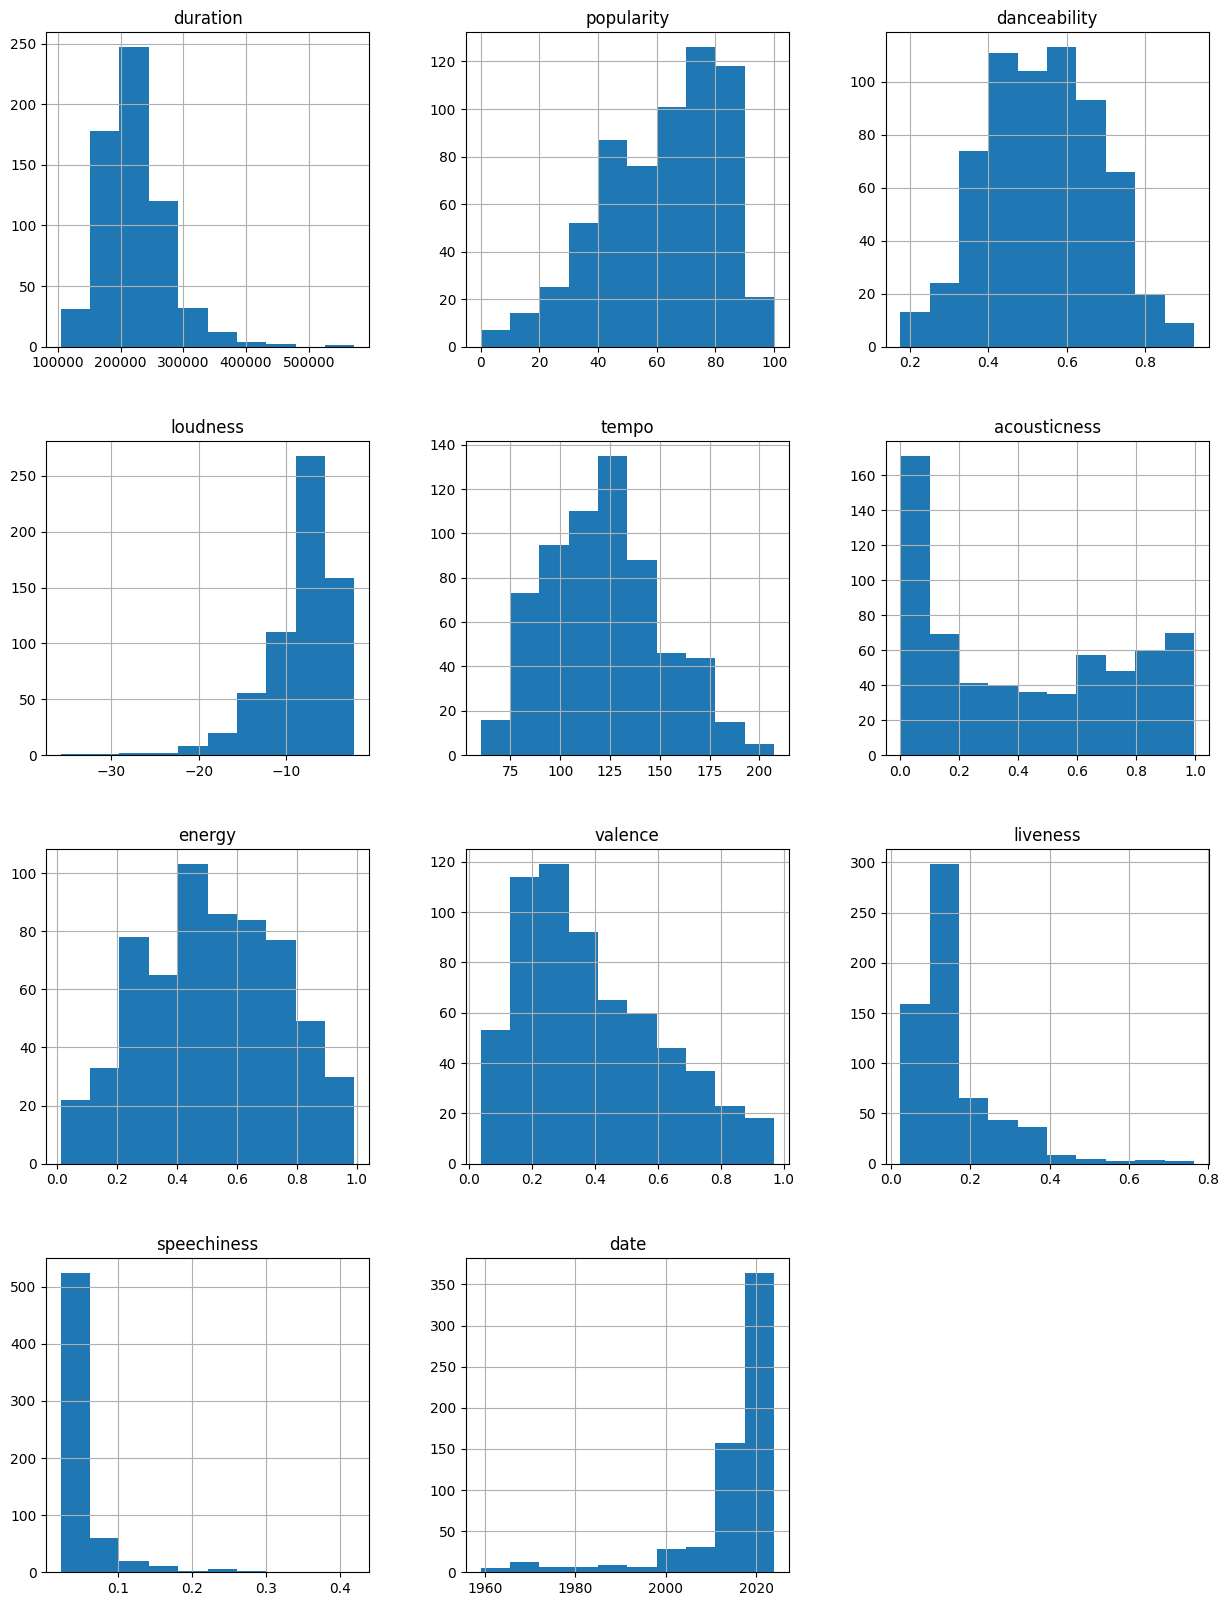

In [14]:
df.hist(figsize=(15,20))

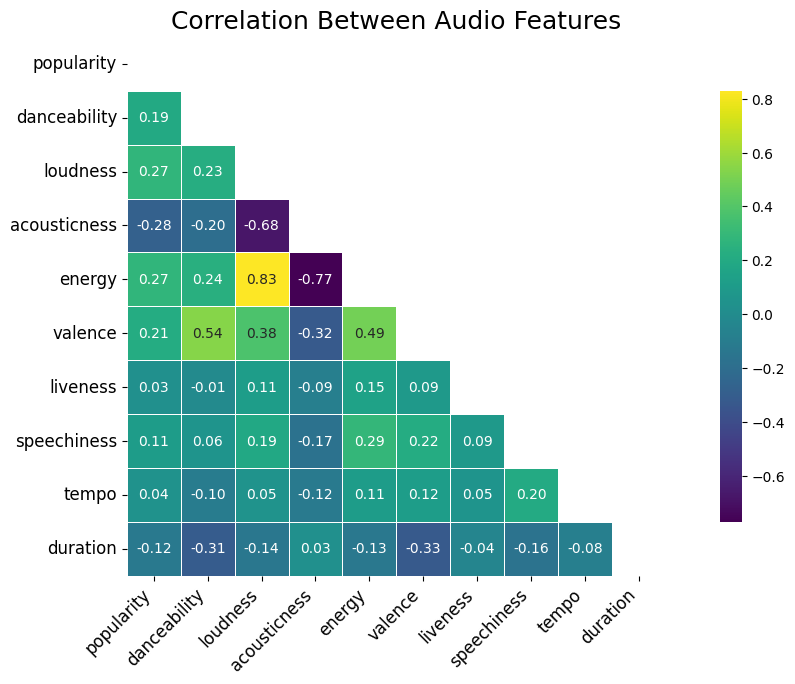

In [15]:
correlation = df2[['popularity', 'danceability', 'loudness', 'acousticness', 'energy', 'valence', 'liveness', 'speechiness', 'tempo', 'duration']].corr()
# Mask to remove the upper triangle
mask = np.triu(np.ones_like(correlation, dtype=bool))
# Plotting the heatmap
plt.figure(figsize=(14, 7))
sns.heatmap(correlation, annot=True, cmap='viridis', fmt='.2f', mask=mask, cbar_kws={"shrink": .8}, linewidths=.5, square=True)
plt.title('Correlation Between Audio Features', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("df_Correlation")
plt.show()

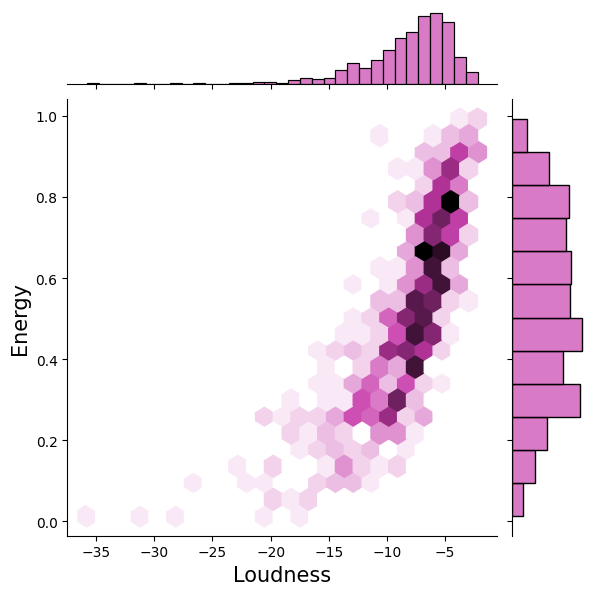

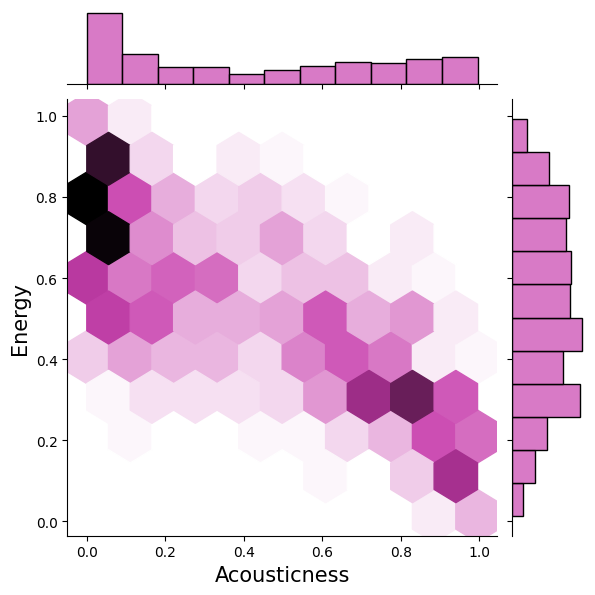

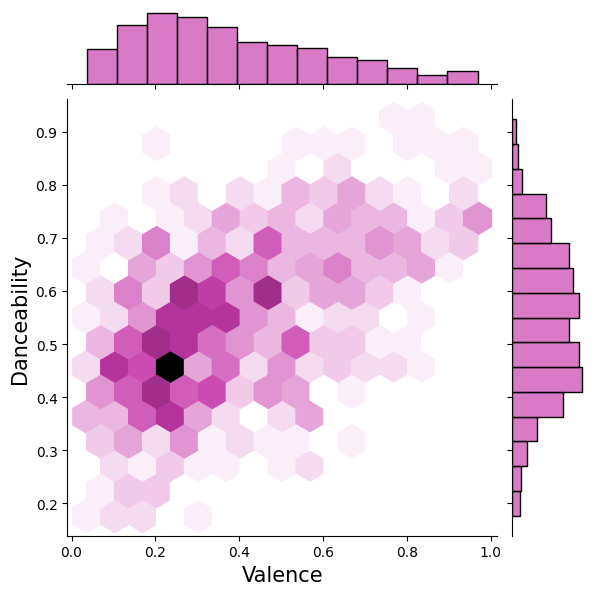

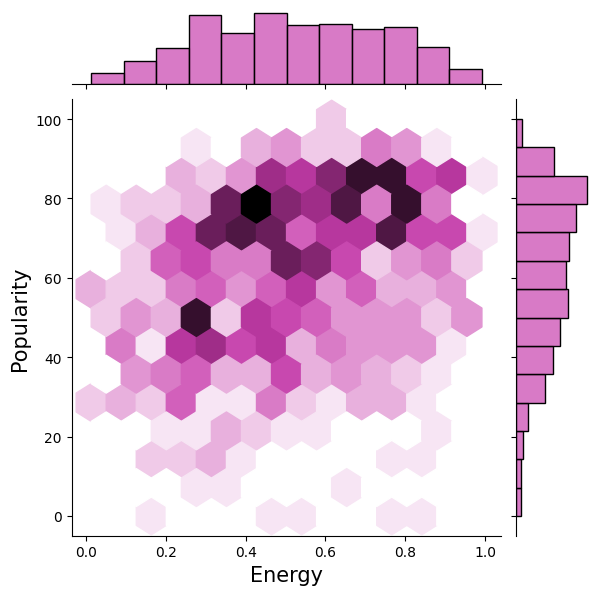

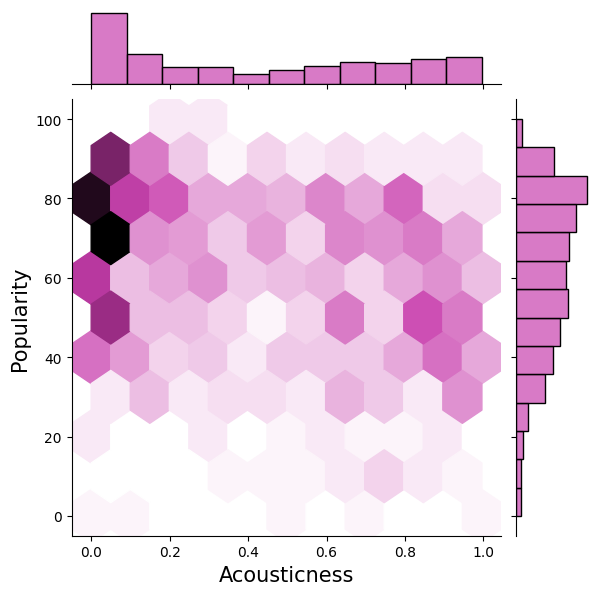

In [16]:
# Set legend font size globally
plt.rc("legend", fontsize=15)

# Define a function to create jointplots
def create_jointplot(x, y, x_label, y_label):
    plot = sns.jointplot(x=x, y=y, kind="hex", color=(0.8, 0.3, 0.7))
    plot.set_axis_labels(x_label, y_label, fontsize=15)
    plt.show()
    plt.close()

# Call the function for each pair of variables
create_jointplot(df['loudness'], df['energy'], "Loudness", "Energy")
create_jointplot(df['acousticness'], df['energy'], "Acousticness", "Energy")
create_jointplot(df['valence'], df['danceability'], "Valence", "Danceability")
create_jointplot(df['energy'], df['popularity'], "Energy", "Popularity")
create_jointplot(df['acousticness'], df['popularity'], "Acousticness", "Popularity")


# Spotify All Out Decades Playlists Analysis

In [17]:
df3 = pd.read_csv('/content/Spotify_All_Out_decade.csv', converters={'genres': eval})
df3

artist                                  name username  \
0         Elvis Presley                        Jailhouse Rock  Spotify   
1       Harry Belafonte                   Banana Boat (Day-O)  Spotify   
2     Big Mama Thornton                             Hound Dog  Spotify   
3           Bobby Darin                        Beyond the Sea  Spotify   
4             Peggy Lee                                 Fever  Spotify   
...                 ...                                   ...      ...   
1195          Rosa Linn                                  SNAP  Spotify   
1196        Tom Grennan                    Little Bit of Love  Spotify   
1197         Ed Sheeran                            Bad Habits  Spotify   
1198  Sabrina Carpenter                              Nonsense  Spotify   
1199       Ryan Gosling  I'm Just Ken (From Barbie The Album)  Spotify   

      explicit  duration  popularity  danceability  loudness    tempo  \
0        False    146480          65         0.647    -9.538  167.396   
1        False    183133          69         0.797   -16.881  122.545   
2        False    181000          54         0.563   -10.862  133.285   
3        False    172480          69         0.521    -7.456  136.483   
4        False    201333          54         0.742   -19.187  137.473   
...        ...       ...         ...           ...       ...      ...   
1195     False    179551          60         0.565    -8.198  170.010   
1196     False    226268          59         0.689    -4.480  106.520   
1197     False    230746          59         0.807    -3.745  126.011   
1198     False    163648          58         0.740    -4.912  138.992   
1199     False    222633          55         0.352    -6.259  140.431   

      acousticness  energy  valence  liveness  speechiness  \
0           0.4100  0.5820    0.915    0.0715       0.0755   
1           0.8850  0.1050    0.419    0.1080       0.0969   
2           0.7060  0.5420    0.785    0.3550       0.0962   
3           0.7230  0.5160    0.569    0.2570       0.0369   
4           0.0906  0.0899    0.351    0.1130       0.1580   
...            ...     ...      ...       ...          ...   
1195        0.1070  0.6360    0.525    0.4470       0.0638   
1196        0.0833  0.7060    0.623    0.1050       0.0312   
1197        0.0451  0.8930    0.537    0.3660       0.0347   
1198        0.0268  0.6970    0.732    0.2240       0.0340   
1199        0.0264  0.6280    0.387    0.0952       0.0428   

                                                 genres  date  
0                           [rock-and-roll, rockabilly]  1950  
1                                             [calypso]  1950  
2     [acoustic blues, blues, harmonica blues, rhyth...  1980  
3     [adult standards, easy listening, lounge, rock...  1950  
4             [adult standards, torch song, vocal jazz]  1980  
...                                                 ...   ...  
1195                                            [alt z]  2020  
1196                                           [uk pop]  2020  
1197               [pop, singer-songwriter pop, uk pop]  2020  
1198                                              [pop]  2020  
1199                                        [hollywood]  2020  

[1200 rows x 16 columns]

array([[<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'popularity'}>,
        <Axes: title={'center': 'danceability'}>],
       [<Axes: title={'center': 'loudness'}>,
        <Axes: title={'center': 'tempo'}>,
        <Axes: title={'center': 'acousticness'}>],
       [<Axes: title={'center': 'energy'}>,
        <Axes: title={'center': 'valence'}>,
        <Axes: title={'center': 'liveness'}>],
       [<Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'date'}>, <Axes: >]], dtype=object)

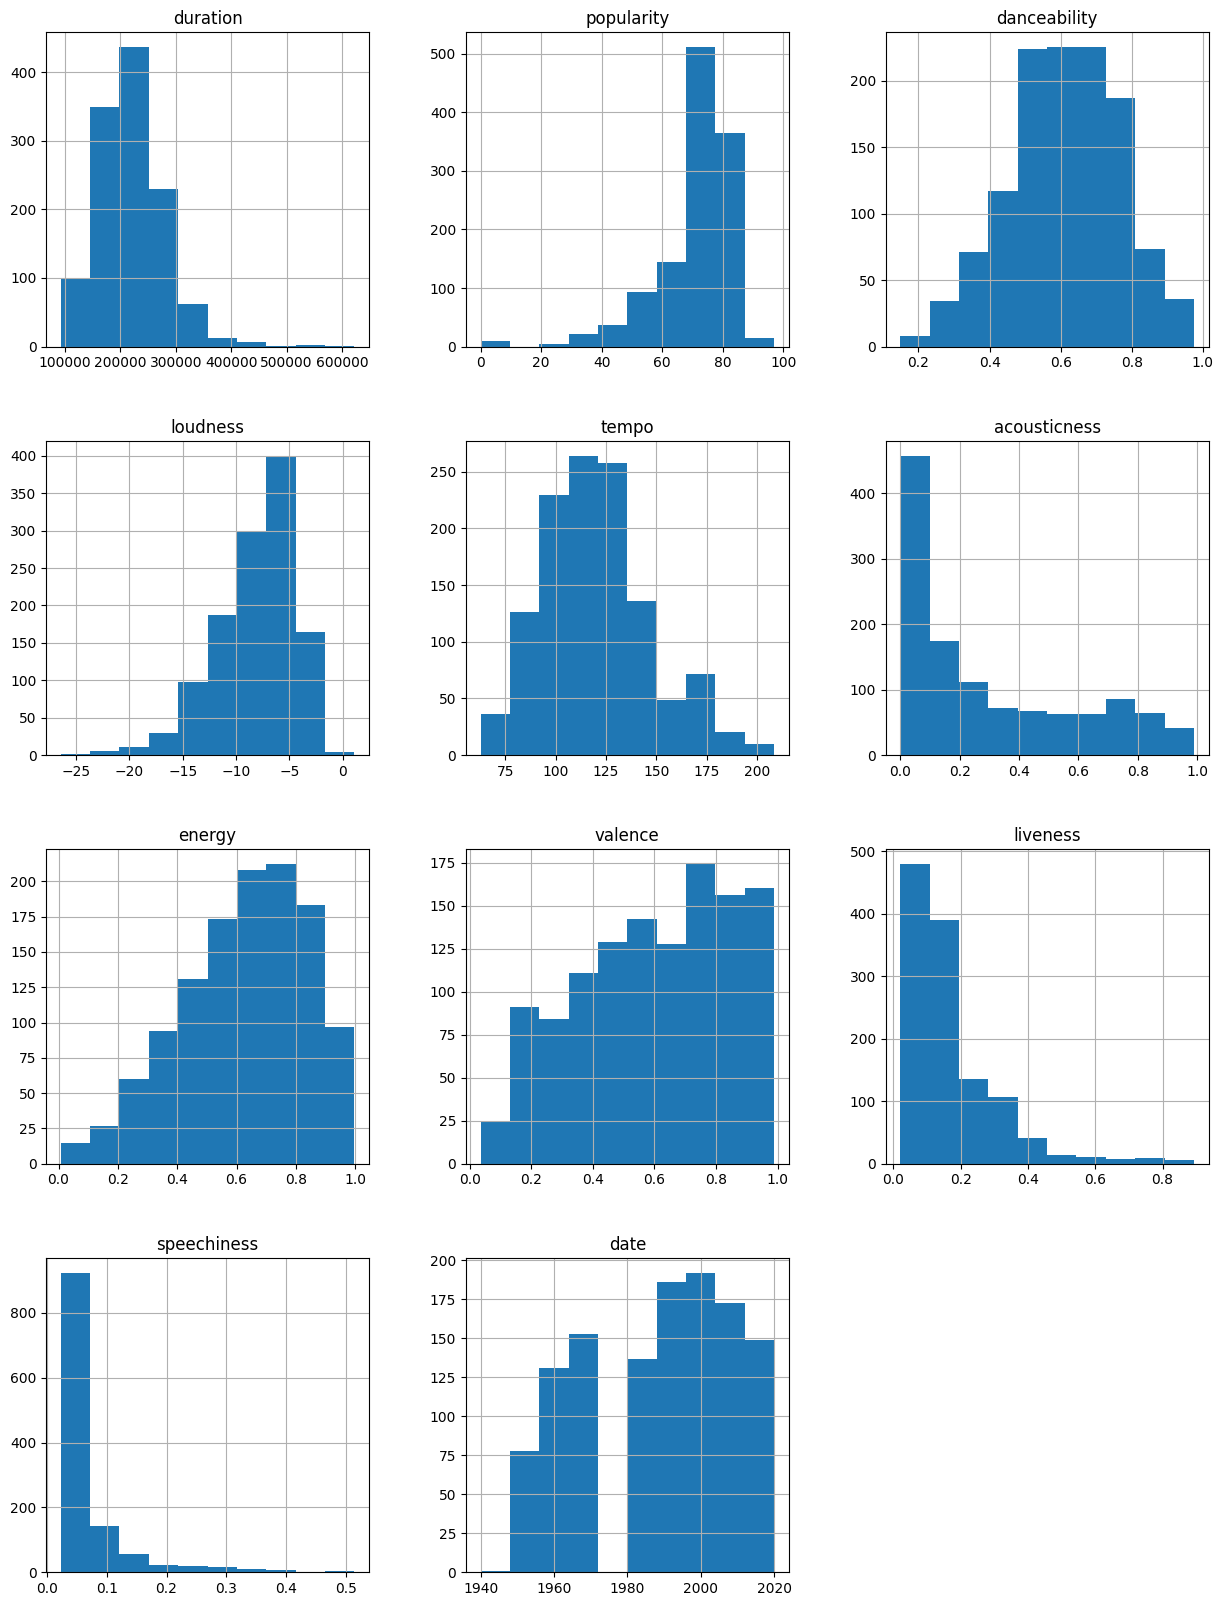

In [18]:
df3.hist(figsize=(15,20))

## Correlation Heatmap

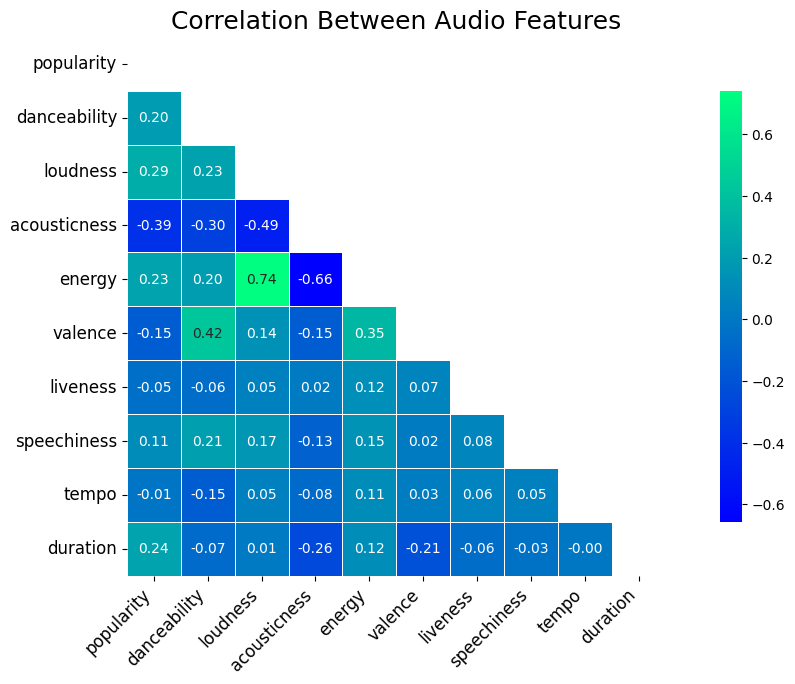

In [19]:
correlation = df3[['popularity', 'danceability', 'loudness', 'acousticness', 'energy', 'valence', 'liveness', 'speechiness', 'tempo', 'duration']].corr()
# Mask to remove the upper triangle
mask = np.triu(np.ones_like(correlation, dtype=bool))
plt.figure(figsize=(14, 7))
sns.heatmap(correlation, annot=True, cmap='winter', fmt='.2f', cbar_kws={"shrink": .8}, linewidths=.5, square=True, mask = mask)
plt.title('Correlation Between Audio Features', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("df_decades_Correlation")
plt.show()

## Danceability & Loudness of All Out's Playlists Over Decades

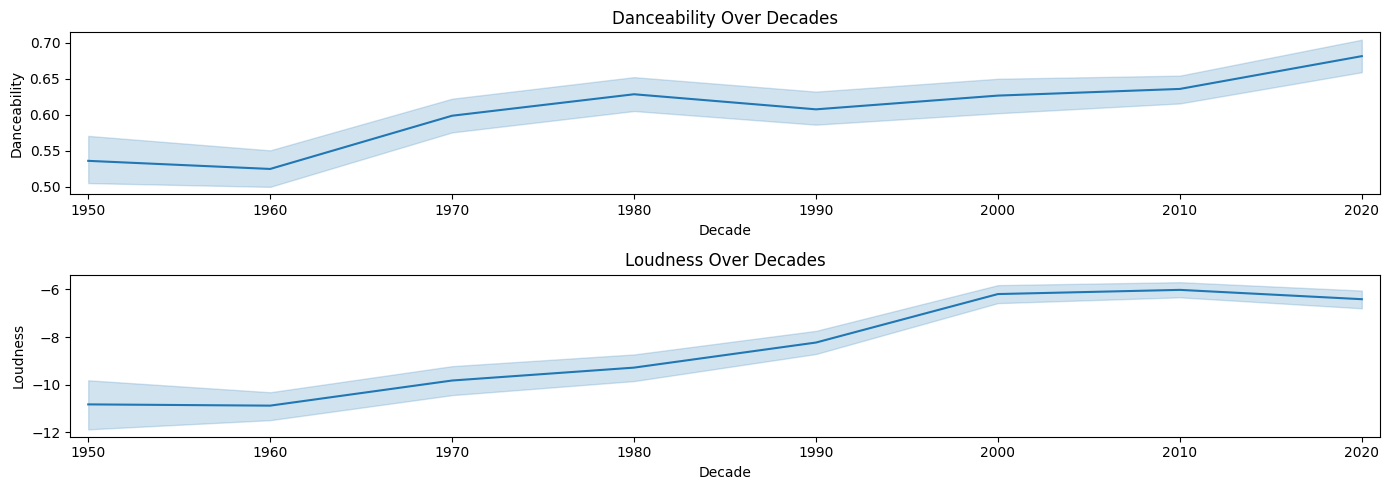

In [20]:
filtered_df = df3[(df3['date'] >= 1950)]
plt.figure(figsize=(14, 5))
# Danceability
plt.subplot(2,1,1)
sns.lineplot(x='date', y='danceability', data = filtered_df)
plt.title('Danceability Over Decades')
plt.xlabel('Decade')
plt.ylabel('Danceability')
plt.xlim(1949, 2021)
plt.tight_layout()

# loudness
plt.subplot(2,1,2)
sns.lineplot(x='date', y='loudness', data = filtered_df)
plt.title('Loudness Over Decades')
plt.xlabel('Decade')
plt.ylabel('Loudness')
plt.xlim(1949, 2021)
plt.tight_layout()
plt.savefig('Danceability_Loudness_Over_Decades')
plt.show()

## Loudness Distribution Over Decades

<ipython-input-21-d88aee716aae>:4: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x='date', y='loudness', data=filtered_df, scale='width')


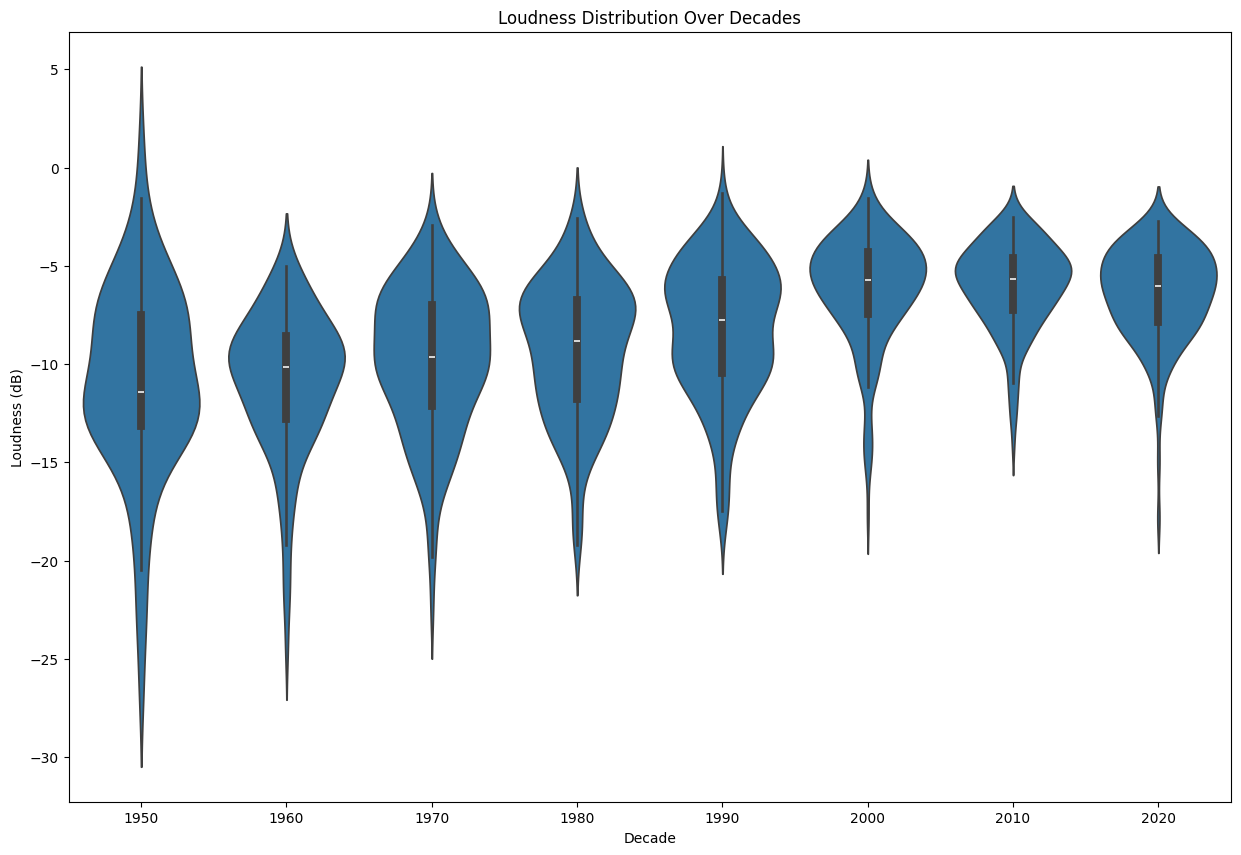

In [21]:
filtered_df = df3[(df3['date'] >= 1950)]

plt.figure(figsize=(15, 10))
sns.violinplot(x='date', y='loudness', data=filtered_df, scale='width')
plt.title('Loudness Distribution Over Decades')
plt.xlabel('Decade')
plt.ylabel('Loudness (dB)')
plt.show()

<Figure size 1500x2000 with 0 Axes>

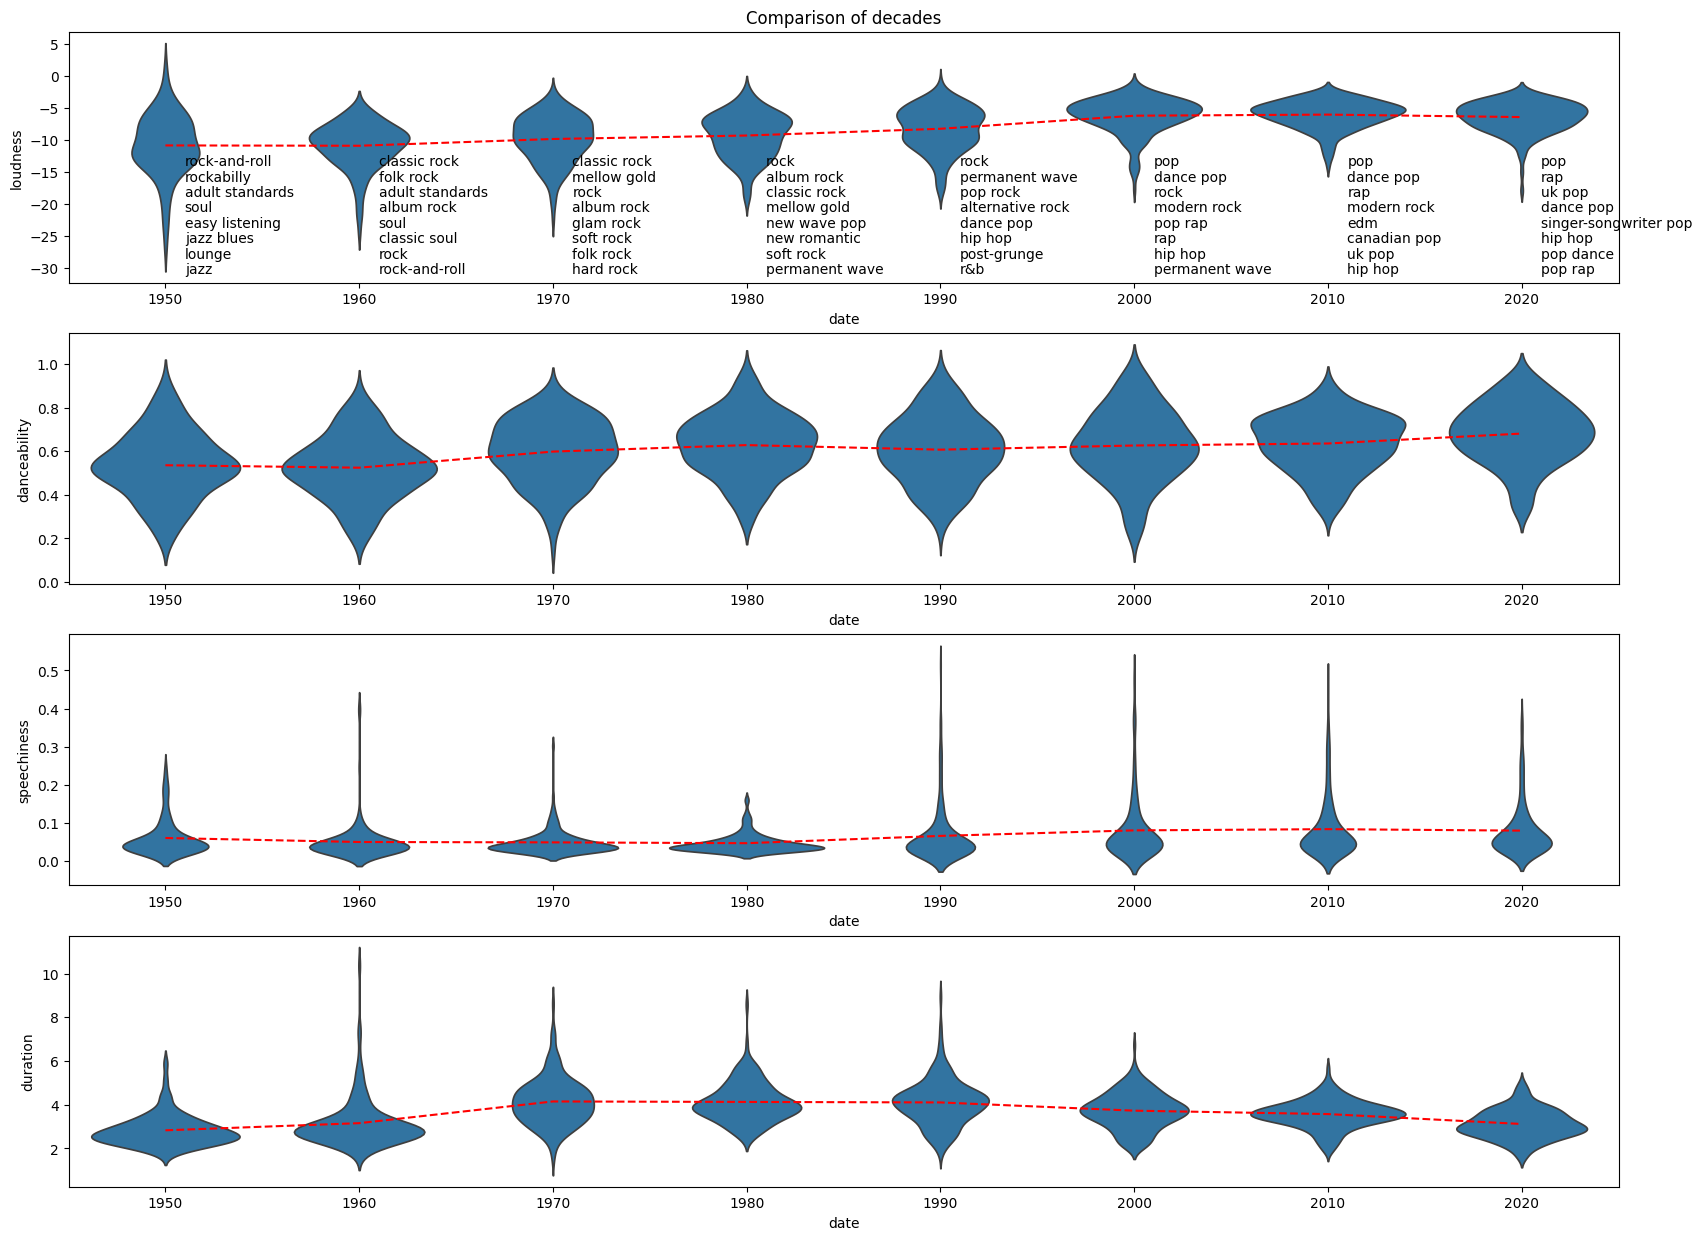

<Figure size 1500x2000 with 0 Axes>

In [22]:
features = df3.loc[:,['explicit', 'popularity', 'danceability','loudness',
                           'acousticness', 'energy', 'valence', 'liveness', 'speechiness', 'tempo', 'duration', 'date']].reset_index().drop(columns='index')
features = features[features['date'].isin(range(1950, 2030, 10))]
plt.figure(figsize=(20, 15))
plt.subplot(4, 1, 1)
plt.title('Comparison of decades')

for index, decade in enumerate(range(1950,2030,10)):
    genres = df3[df3.date == decade].genres.to_numpy().flatten()
    genres = np.concatenate(genres, axis=0)

    unique, counts = np.unique(genres, return_counts=True)
    genres = dict((zip(unique, counts)))
    genres = sorted(genres.items(), key=lambda x: x[1],  reverse=True)

    tmp = [genre[1] for genre in genres]
    tmp2 =  [genre[0] for genre in genres]

    for i in range(8):
        plt.text(x=index + 0.1, y= -14 - i*2.4,  s=f"{tmp2[i]}", rotation=0, fontsize=10)

plt.plot(range(8), features[['date', 'loudness']].groupby(features['date']).mean()['loudness'], 'r--')
sns.violinplot(x= features['date'],
             y= features['loudness'], inner=None)
plt.subplot(4,1,2)
plt.plot(range(8), features[['date', 'danceability']].groupby(features['date']).mean()['danceability'], 'r--')
sns.violinplot(x= features['date'],
             y= features['danceability'], inner=None)
plt.subplot(4,1,3)
plt.plot(range(8), features[['date', 'speechiness']].groupby(features['date']).mean()['speechiness'], 'r--')
sns.violinplot(x= features['date'],
             y= features['speechiness'], inner=None)
plt.subplot(4,1,4)
plt.plot(range(8), features[['date', 'duration']].groupby(features['date']).mean()['duration']/60000, 'r--')
sns.violinplot(x= features['date'],
             y= features['duration']/60000, inner=None)

plt.savefig('Decades_Comparision')
plt.figure(figsize=(15, 20))

# Determining the classifications of my Spotify tracks through K-Means Clustering

## PCA

<ipython-input-23-a410771f66d0>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_melodic['cluster'] = clusters


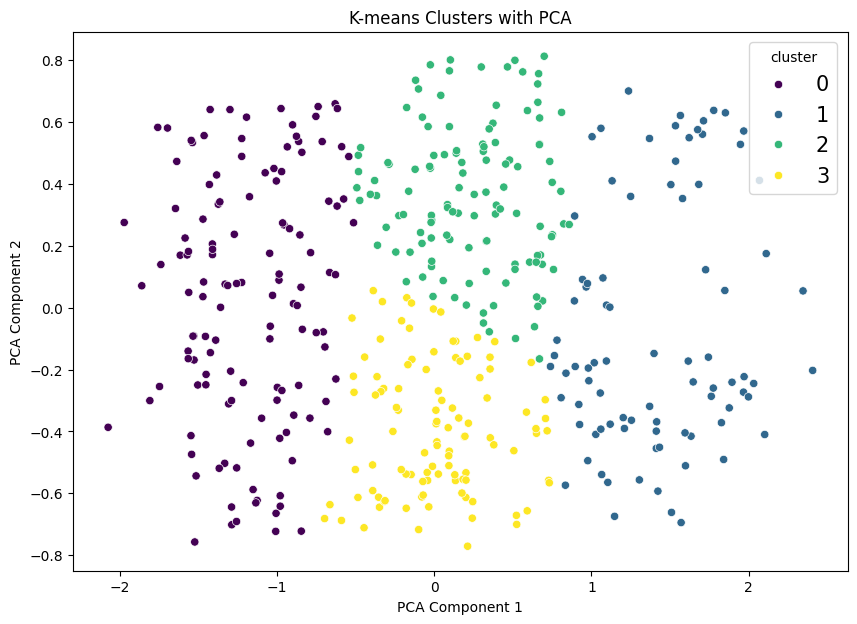

In [23]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Filter data for MelodicWanderer
df_melodic = df2[df2['username'] == 'MelodicWanderer']

# Features to be used for clustering
features = ['danceability', 'loudness', 'tempo', 'acousticness', 'energy', 'valence', 'liveness', 'speechiness']

# Perform PCA
pca = PCA(n_components=2)
df_melodic_pca = pca.fit_transform(df_melodic[features])

# K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(df_melodic_pca)
df_melodic['cluster'] = clusters

# Visualize PCA result
plt.figure(figsize=(10,7))
sns.scatterplot(x=df_melodic_pca[:, 0], y=df_melodic_pca[:, 1], hue=df_melodic['cluster'], palette='viridis')
plt.title('K-means Clusters with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

getting 3 example tracks for each cluster

In [24]:
# For each cluster, get 3 example tracks
example_tracks = df_melodic.groupby('cluster').apply(lambda x: x.sample(3, random_state=42)).reset_index(drop=True)

# Display the examples in a neat table
example_tracks = example_tracks[['cluster', 'artist', 'name']].style.set_properties(**{'text-align': 'left'}).set_table_styles([dict(selector='th', props=[('text-align', 'left')])])

example_tracks

<ipython-input-24-4b77694bf962>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  example_tracks = df_melodic.groupby('cluster').apply(lambda x: x.sample(3, random_state=42)).reset_index(drop=True)


## t-SNE

<ipython-input-25-90fc7e84d9ae>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_melodic['cluster'] = clusters


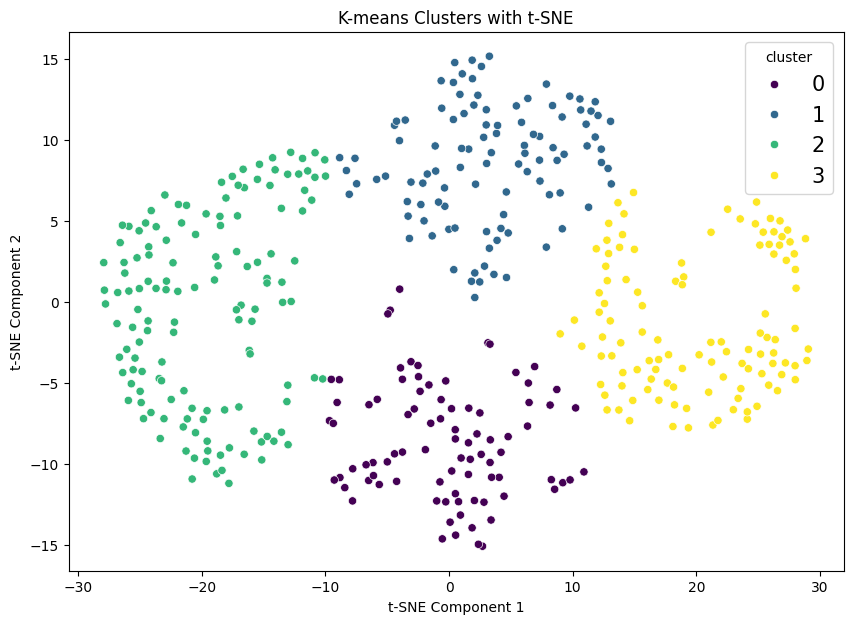

In [25]:
from sklearn.manifold import TSNE

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
df_melodic_tsne = tsne.fit_transform(df_melodic[features])

# K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(df_melodic_tsne)
df_melodic['cluster'] = clusters

# Visualize t-SNE result
plt.figure(figsize=(10,7))
sns.scatterplot(x=df_melodic_tsne[:, 0], y=df_melodic_tsne[:, 1], hue=df_melodic['cluster'], palette='viridis')
plt.title('K-means Clusters with t-SNE')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.savefig('tSNE_clusters.png')
plt.show()

In [26]:
# For each cluster, get 3 example tracks
example_tracks_tsne = df_melodic.groupby('cluster').apply(lambda x: x.sample(3, random_state=42)).reset_index(drop=True)

# Display the examples in a neat table
example_tracks_tsne_styled = example_tracks_tsne[['cluster', 'artist', 'name']].style.set_properties(**{'text-align': 'left'}).set_table_styles([dict(selector='th', props=[('text-align', 'left')])])
display(example_tracks_tsne_styled)

<ipython-input-26-85772aec8336>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  example_tracks_tsne = df_melodic.groupby('cluster').apply(lambda x: x.sample(3, random_state=42)).reset_index(drop=True)


### techniques to determine the optimal number of clusters:

Elbow Method: Look for the "elbow" point in the WCSS plot.

Silhouette Score: Higher values indicate better clusters.

Davies-Bouldin Index: Lower values indicate better clusters.

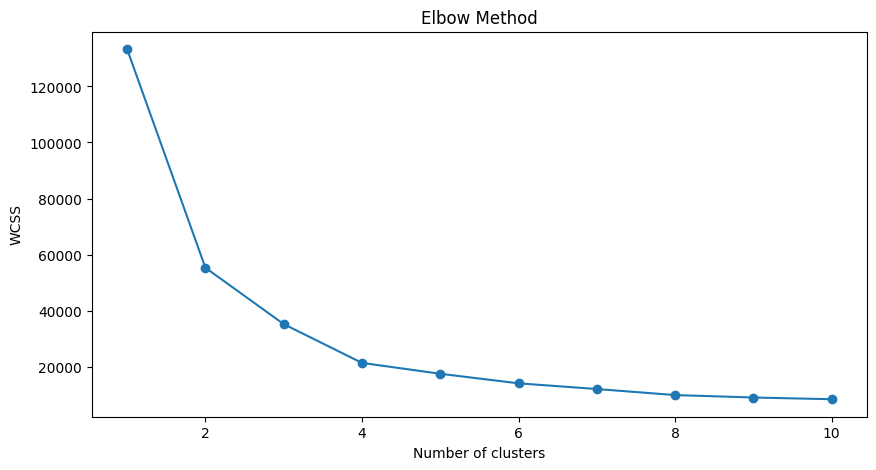

In [27]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_melodic_tsne)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

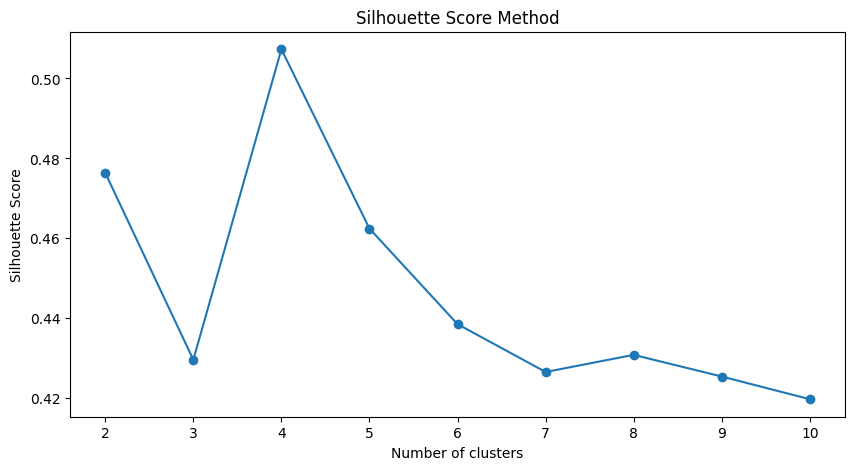

In [28]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    clusters = kmeans.fit_predict(df_melodic_tsne)
    silhouette_scores.append(silhouette_score(df_melodic_tsne, clusters))

plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

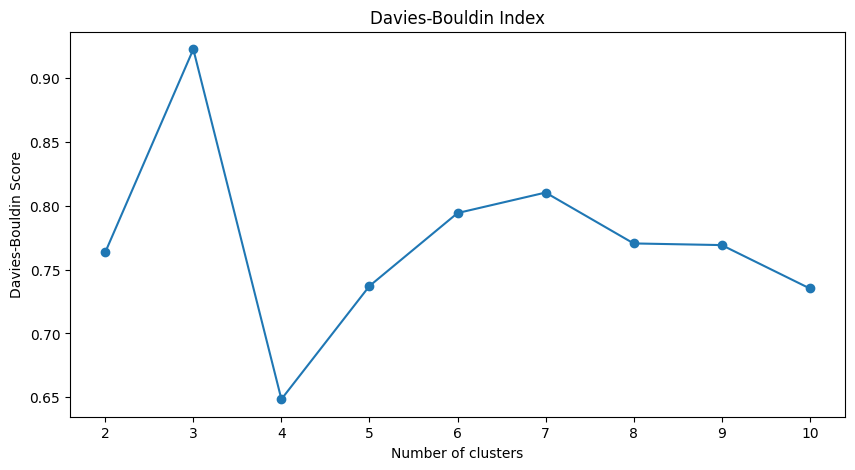

In [29]:
from sklearn.metrics import davies_bouldin_score

db_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    clusters = kmeans.fit_predict(df_melodic_tsne)
    db_scores.append(davies_bouldin_score(df_melodic_tsne, clusters))

plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), db_scores, marker='o')
plt.title('Davies-Bouldin Index')
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin Score')
plt.show()

In [30]:
import plotly.express as px
# Creating a DataFrame for t-SNE results
tsne_df = pd.DataFrame(df_melodic_tsne, columns=['x', 'y'])
tsne_df['cluster'] = df_melodic['cluster']
tsne_df['genres'] = df_melodic['genres']
tsne_df['track_name'] = df_melodic['name']
# Visualize t-SNE result using plotly.express
fig = px.scatter(tsne_df, x='x', y='y', color='cluster', hover_data=['x', 'y', 'genres', 'track_name'], title="t-SNE Clusters")
fig.update_layout(width=1000, height=700)
fig.show()
